#### Import necessary modules

In [67]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

#### Define the model architecture

In [68]:
def build_DNN_model():
  inputs = Input(shape=(1))
  x = Dense(32,activation = 'relu')(inputs)
  x = Dense(64,activation = 'relu')(x)
  x = Dense(128,activation = 'relu')(x)
  outputs = Dense(1,name = 'OutputLayer')(x)

  model = Model(inputs,outputs)
  return model


In [69]:
# y = 5x^3 - 8x^2 -7x + 1
def polynomial(x):
  return 5*(x**3) - 8*(x**2) - 7*x + 1

#### Generating sample data

In [70]:
x = np.random.randint(-20,20,10000,dtype = int)
y = polynomial(x)
# print(x)
# print(y)

#### Normalizing the samples in the range -1 to +1

In [71]:
xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)
x_norm = 2*((x - xmin) / (xmax - xmin)) - 1
y_norm = 2*((y - ymin) / (ymax - ymin)) - 1

# x_norm = (x - xmin) / (xmax - xmin) * 2 - 1
# y_norm = (y - ymin) / (ymax - ymin) * 2 - 1

#### Creating training,test and validation data

In [72]:
size = len(x_norm)

# Train data
x_train = x_norm[:int(size*0.9)]
y_train = y_norm[:int(size*0.9)]

#  Validation data
x_valid = x_norm[int(size*0.9):int(size*0.95)]
y_valid = y_norm[int(size*0.9):int(size*0.95)]

# Test data
x_test = x_norm[int(size*0.95):]
y_test = y_norm[int(size*0.95):]

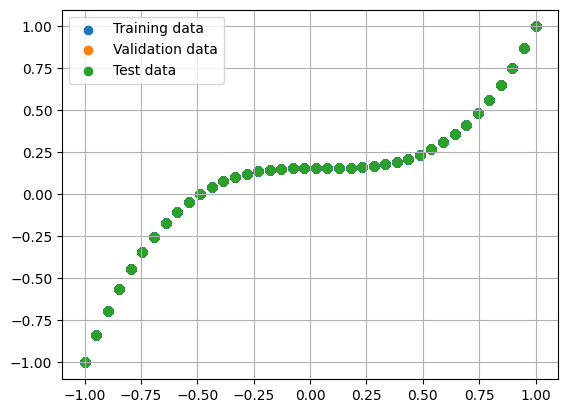

In [73]:
plt.scatter(x_train,y_train,label = 'Training data')
plt.scatter(x_valid,y_valid,label = 'Validation data')
plt.scatter(x_test,y_test,label = 'Test data')

plt.legend()
plt.grid()
plt.show()

#### DNN model

In [74]:
model = build_DNN_model()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_18 (Dense)            (None, 32)                64        
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 OutputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the model

In [59]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = [tensorflow.keras.metrics.R2Score(name = 'accuracy')])
fitted_model = model.fit(x_train,y_train,epochs = 20,validation_data = (x_valid,y_valid))
history = fitted_model.history




Epoch 1/20
282/282 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.9179 - val_loss: 2.9090e-04 - val_accuracy: 0.9982
Epoch 2/20
282/282 [==============================] - 1s 3ms/step - loss: 1.2386e-04 - accuracy: 0.9993 - val_loss: 3.2568e-05 - val_accuracy: 0.9998
Epoch 3/20
282/282 [==============================] - 1s 3ms/step - loss: 2.4937e-05 - accuracy: 0.9999 - val_loss: 3.2815e-05 - val_accuracy: 0.9998
Epoch 4/20
282/282 [==============================] - 1s 5ms/step - loss: 1.4961e-05 - accuracy: 0.9999 - val_loss: 5.9533e-06 - val_accuracy: 1.0000
Epoch 5/20
282/282 [==============================] - 2s 5ms/step - loss: 7.7977e-06 - accuracy: 1.0000 - val_loss: 6.5510e-06 - val_accuracy: 1.0000
Epoch 6/20
282/282 [==============================] - 1s 3ms/step - loss: 8.6043e-06 - accuracy: 0.9999 - val_loss: 1.3820e-05 - val_accuracy: 0.9999
Epoch 7/20
282/282 [==============================] - 1s 3ms/step - loss: 8.6565e-06 - accuracy: 0.9999 

## Plotting

#### Plotting the training and validation accuracy

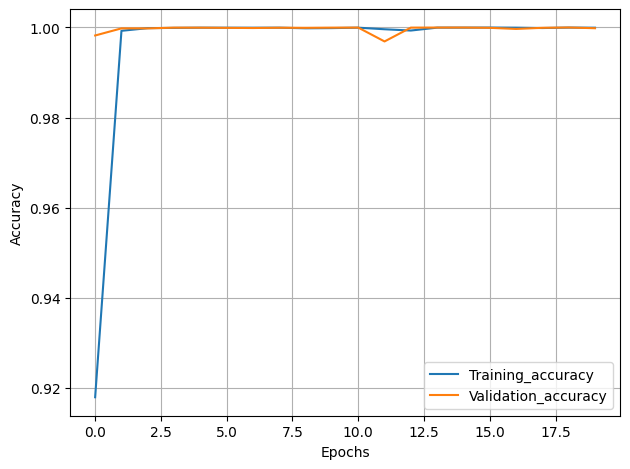

In [60]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy','Validation_accuracy'])
plt.grid()
plt.tight_layout()
plt.show()

#### Plotting the training and validation loss

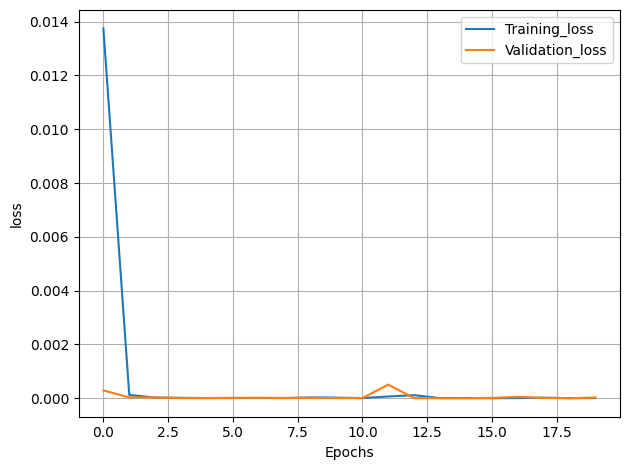

In [61]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Training_loss','Validation_loss'])
plt.grid()
plt.tight_layout()
plt.show()

#### Evaluating the model on test data

In [62]:
# evalute the model
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Test loss: {test_loss: .7f}")
print(f"Test Accuracy: {test_accuracy*100 : .5f}%")

16/16 [==============================] - 0s 2ms/step - loss: 2.7891e-05 - accuracy: 0.9998
Test loss:  0.0000279
Test Accuracy:  99.98075%


#### Prediction

In [63]:
# predict on test data
predicted_val= model.predict(x_test)


16/16 [==============================] - 0s 2ms/step


#### Display the test data

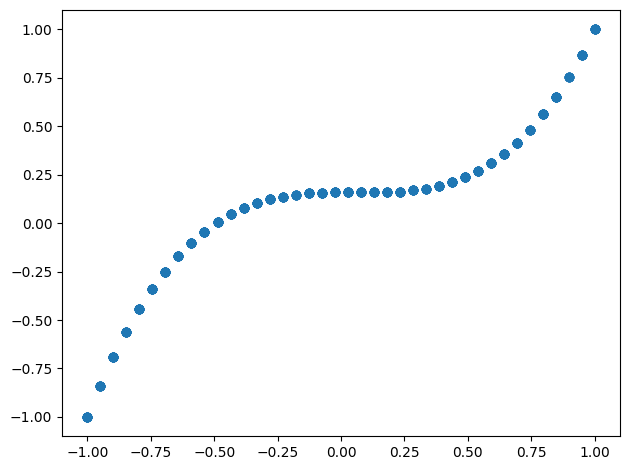

In [64]:
plt.scatter(x_test,y_test)
plt.tight_layout()
plt.show()

#### Display the predicted accuracy vs true levels

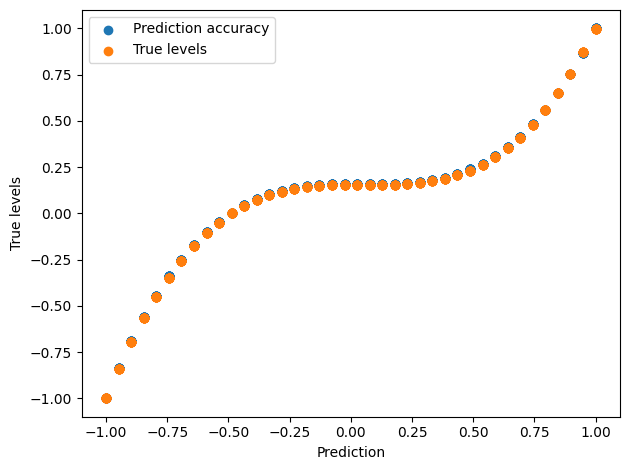

In [65]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,predicted_val)
plt.xlabel('Prediction')
plt.ylabel('True levels')
plt.legend(['Prediction accuracy','True levels'])
plt.tight_layout()
plt.show()